1.Mengimpor library-library yang diperlukan untuk pemodelan ML

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2.Menentukan dan menampilkan dataset yang akan dipakai pada sebuah
dataframe. Dalam kasus ini data mobil diperoleh dari Kaggle. Amati data yang
ditampilkan

In [ ]:
#https://www.kaggle.com/datasets/goyalshalini93/car-data
df_mobil = pd.read_csv("CarPrice_Assignment.csv")
df_mobil

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


3.Cek apakah ada data yang kosong pada dataset tersebut.

In [16]:
missing_values = df_mobil.isnull().sum()
missing_values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

4.Tampilkan nilai count, mean, std, nilai min, kuartil 1 (25%), median (50%),
kuartil 3 (75%), nilai max pada dataset tersebut sehingga hasilnya pada
gambar di bawah ini.

In [19]:
statistics = df_mobil.describe()
statistics

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


5.Tampilkan semua tipe data pada dataset tersebut

In [22]:
data_types = df_mobil.dtypes
data_types

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

6.Tampilkan grafik untuk menunjukkan distribusi harga mobil.

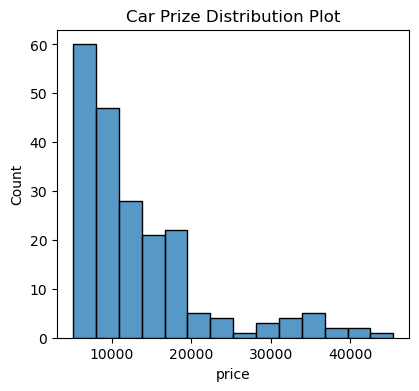

In [25]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Car Prize Distribution Plot')
sns.histplot(df_mobil.price)

plt.show()

7.Tampilkan grafik sebaran nama-nama mobil yang ada pada dataset.

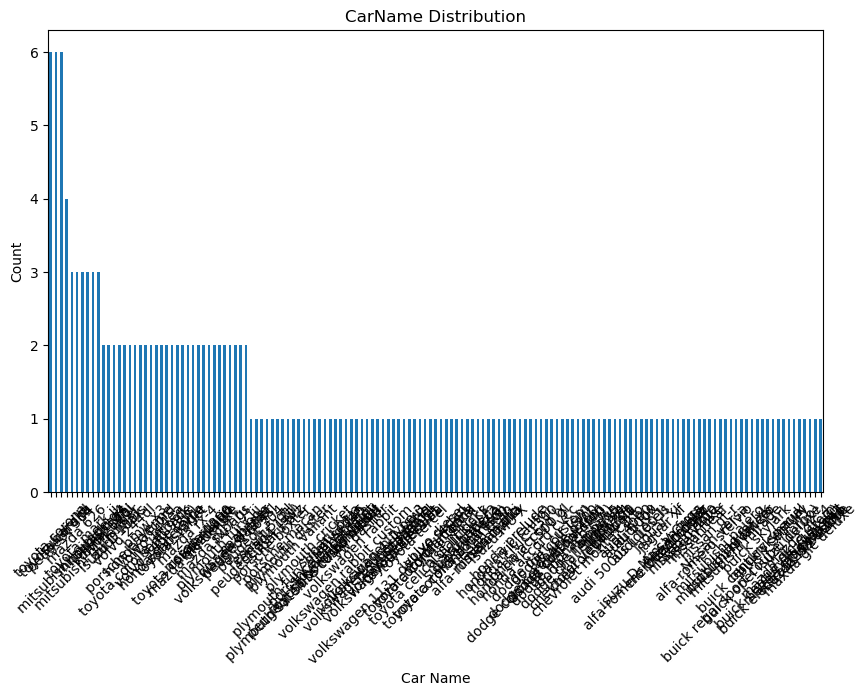

In [30]:
car_counts = df_mobil['CarName'].value_counts()

plt.figure(figsize=(10,6))
car_counts.plot(kind="bar")
plt.title("CarName Distribution")
plt.xlabel("Car Name")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

8.Tampilkan 10 nama mobil terbanyak pada dataset

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
mazda 626               3
toyota mark ii          3
mitsubishi outlander    3
mitsubishi g4           3
honda civic             3
Name: count, dtype: int64


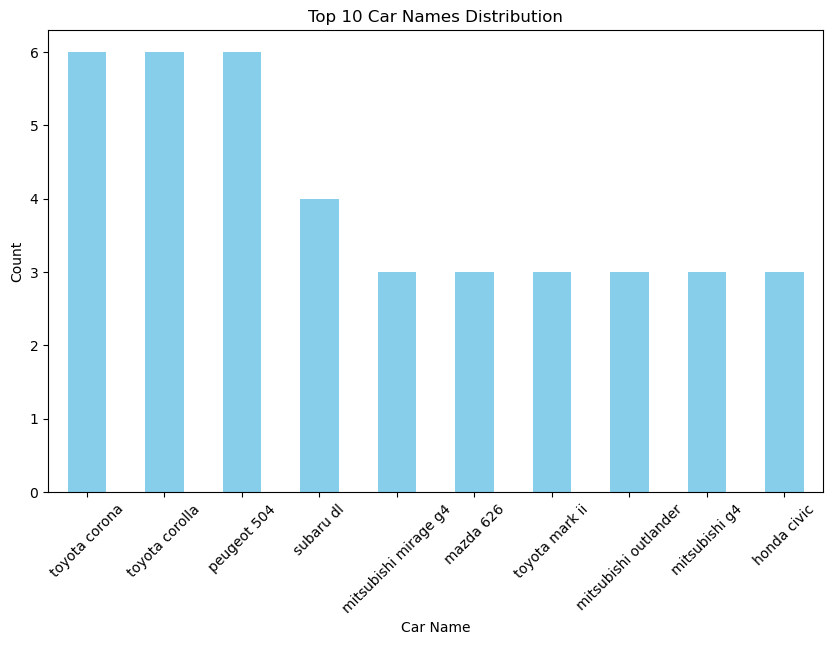

In [33]:
car_counts = df_mobil['CarName'].value_counts()

top_10_cars = car_counts.head(10)
print(top_10_cars)

plt.figure(figsize=(10, 6))
top_10_cars.plot(kind="bar", color='skyblue')
plt.title("Top 10 Car Names Distribution")
plt.xlabel("Car Name")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

9.Buatkan sebuah world cloud untuk nama-nama mobil yang ada seperti pada
gambar di bawah ini.

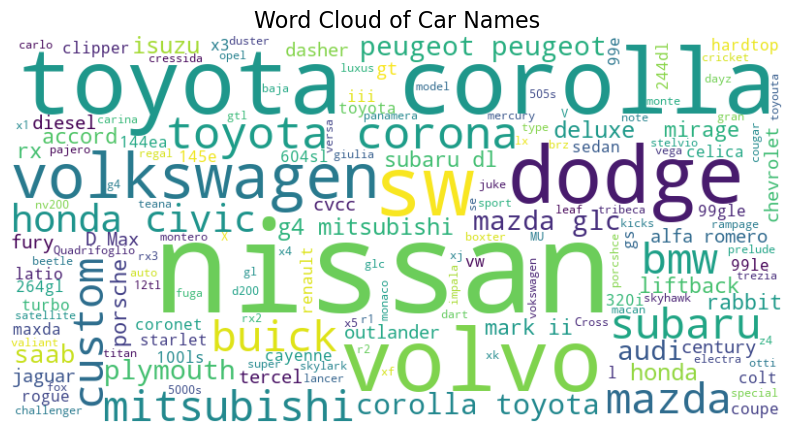

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

car_names = " ".join(df_mobil['CarName'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(car_names)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Car Names", fontsize=16)
plt.show()

10.Tampilkan sebuah scatter plot untuk menunjukkan hubungan antara data
highwaympg dengan price pada dataset. Jelaskan arti dari scatter plot
tersebut.

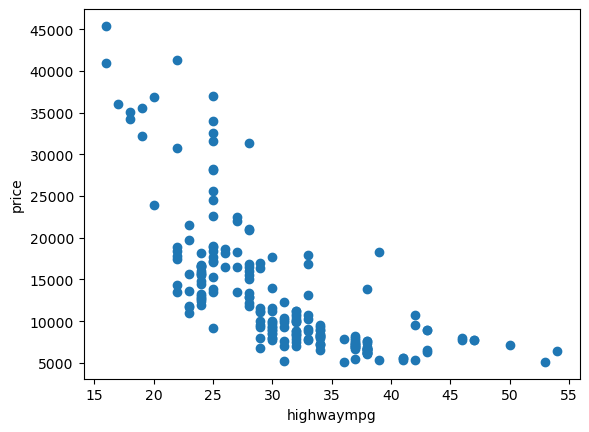

In [68]:
plt.scatter(df_mobil['highwaympg'], df_mobil['price'])
plt.xlabel('highwaympg')
plt.ylabel('price')
plt.show()

Scatter plot tersebut menunjukkan hubungan antara konsumsi bahan bakar di jalan raya (highwaympg) dan harga mobil (price). Setiap titik mewakili satu mobil, dengan posisi horizontal yang menunjukkan konsumsi bahan bakar dan posisi vertikal yang menunjukkan harga mobil. Dari plot ini, dapat dilihat apakah ada pola yang menunjukkan hubungan antara kedua variabel tersebut. Jika titik-titik membentuk pola tertentu yang menandakan ada hubungan antara konsumsi bahan bakar dan harga mobil. Jika titik-titik tersebar acak, mungkin tidak ada hubungan antara keduanya.

11.Pada kasus ini, digunakan metode Linear Regression untuk membangun
model prediksi harga mobil.

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

12.Tentukan variable independent (X) sebagai inputan yakni 'highwaympg',
'curbweight', dan 'horsepower', dan variable dependent (y) sebagai output
dari model ini yakni 'price'.

In [100]:
X = df_mobil[['highwaympg','curbweight','horsepower']]
y = df_mobil['price']

13.Lalu bagi dataset menjadi data pelatihan (X_train dan y_train) dan data
pengujian (X_test dan y_test). Data pengujian akan diambil 20% dari total data
menggunakan random state 42.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

14.Buat objek model menggunakan class LinearRegression, dan lakukan
pelatihan pada fitur data pelatihan (X) dan target data pelatihan (y), yang
berisi nilai target yang akan diprediksi yakni ‘price’.

In [106]:
model_regresi = LinearRegression()
model_regresi.fit(X_train, y_train)

LinearRegression()

15.Lakukan prediksi menggunakan model regresi linear yang telah dilatih pada
data pengujian (X_test).

In [109]:
model_regresi_pred = model_regresi.predict(X_test)

16.Visualisasikan hasil prediksi dari model regresi linear tersebut. Pada sumbu x
(X_test.iloc[:, 0]), digunakan nilai 'highwaympg' dari data pengujian (X_test),
dan pada sumbu y (model_regresi_pred), digunakan nilai prediksi harga mobil
4
(price) yang dihasilkan oleh model. Jelaskan perbandingan hasil scatter plot
ini dengan no 10.

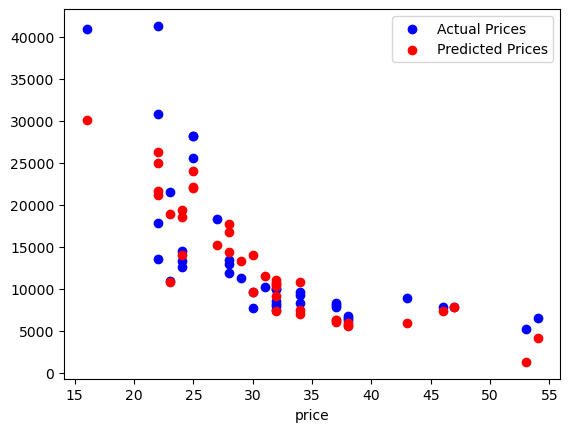

In [112]:
plt.scatter(X_test.iloc[:, 0], y_test, label='Actual Prices', color='blue')
plt.scatter(X_test.iloc[:, 0], model_regresi_pred, label='Predicted Prices', color='red')
plt.xlabel('highwaympg')
plt.xlabel('price')
plt.legend()
plt.show()

Pada plot No.10 menunjukkan bagaimana data asli tersebar dan hubungan dasar antara konsumsi bahan bakar di jalan raya (highwaympg) dan harga mobil. Sedangkan pada plot No.16 menunjukkan seberapa baik model regresi yang dipilih dalam memprediksi harga mobil berdasarkan konsumsi bahan bakar di jalan raya dengan membandingkan nilai yang diprediksi (titik merah) dan nilai asli (titik biru). Jika model regresi yang dipilih bagus, titik merah akan berdekatan dengan titik biru. Jadi, pada plot No.10 hanya menggambarkan hubungan antara konsumsi bahan bakar dengan harga mobil, sedangkan pada plot No.16 menggambarkan hubungan keduanya dan memperhitungkan model prediksi yang dipilih.

17.Lakukan tes prediksi harga mobil menggunakan inputan nilai-nilai
highwaympg = 32, curbweight = 2338, dan horsepower = 75. Berapa prediksi
harganya?

In [119]:
X = np.array([[32, 2338, 75]])
harga_X = model_regresi.predict(X)
harga_X

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8860.16924466])

18.Ubah nilai array tersebut menjadi integer.

In [132]:
harga_X_int = int(round(harga_X[0])) 

harga_X_int

8860

19.Lakukan evaluasi untuk mengetahui nilai MAE, MSE, dan RMSE.

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, model_regresi_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

mse = mean_squared_error(y_test, model_regresi_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 3028.21
Mean Squared Error (MSE): 17659419.44
Root Mean Squared Error (RMSE): 4202.31


20.Jelaskan hasil evaluasi tersebut

Hasil evaluasi menunjukkan bahwa model prediksi memiliki rata-rata kesalahan absolut sebesar 3028.21 (MAE), rata-rata kesalahan kuadrat sebesar 17659419.44 (MSE), dan akar dari rata-rata kesalahan kuadrat sebesar 4202.31 (RMSE). Nilai-nilai tersebut menandakan bahwa, secara rata-rata, prediksi model bervariasi dari nilai aktual dengan kesalahan sekitar 3028.21 unit dan memberikan hasil lebih besar untuk kesalahan besar, seperti tercermin dalam nilai MSE dan RMSE. Oleh karena itu, semakin kecil hasil dari ketiga nilai tersebut, semakin baik pula model tersebut dalam membuat prediksi.